# IMT547 - SP19
## Topic: Collecting Twitter Data Demo
### Instructor: Li Zeng (lizeng@uw.edu) - April 17, 2019

### Preparation

In [1]:
# Import the necessary package to process Json data
import json

# Import the twitter library to interact with the Twitter APIs
import twitter

In [2]:
# Your credentials - keep them safe!
# Alternatively, you can load your credential info from a seperate file (safer)
CONSUMER_KEY = '5CIfQ5uluxVDY0M7rhEYelNF3'
CONSUMER_SECRET = 'BRbvVZh36NujNJ9e90ycsZ8v1j5lQLswUwFJvioW8RWVBF58Y4'
ACCESS_TOKEN = '336449661-i3O693twGAQt113pD4QJHObBRtBAIOnKQPtZ6J94'
ACCESS_SECRET = 'jjHQ9C0LWxsmWH8wQbdauZYEk7R4dXFjzCrB9awM4Pcib'

In [3]:
# Authenticate with Twitter in OAuth
oauth = twitter.OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

### Streaming API

In [4]:
# Initiate the connection to Twitter Streaming API
twitter_stream = twitter.TwitterStream(auth=oauth)

# Get a sample of the public data following through Twitter
#iterator = twitter_stream.statuses.sample()

# You can also specify filters
# more detail: https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter.html
# and https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters
iterator = twitter_stream.statuses.filter(track= "Trump", language="en")

In [5]:
# Look at one single tweet
next(iterator)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Apr 23 18:53:27 +0000 2019',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 548384458,
    'id_str': '548384458',
    'indices': [3, 19],
    'name': 'Joyce Alene',
    'screen_name': 'JoyceWhiteVance'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 1120762625950998541,
 'id_str': '1120762625950998541',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'en',
 'place': None,
 'quote_count': 0,
 'quoted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Apr 23 17:17:17 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/1120738424091226112',
    

In [6]:
# Let's get a few more tweets!
# If you want more, you can get rid of the stop setting
# and let the Twitter API run for days longer
max_count = 10
current_count = 0
collection = []   
for tweet in iterator:
    # get tweet and append it to the collection
    collection.append(tweet)
    # count
    current_count += 1
    if current_count >= max_count:
        break 

In [7]:
# now print our Twitter collection which contains 10 tweets
print("# of the tweets:", len(collection))
# then print out the raw tweets
print(collection)


# of the tweets: 10
[{'created_at': 'Tue Apr 23 18:53:27 +0000 2019', 'id': 1120762625892208641, 'id_str': '1120762625892208641', 'text': 'RT @charlescwcooke: This, right here, is our bipartisan problem. This is exactly the argument Obama made with DACA, and it’s the argument T…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 119618571, 'id_str': '119618571', 'name': 'Jennifer *pouncing*  Bossypants 👖', 'screen_name': 'ajenable', 'location': 'O Maryland My Maryland', 'url': None, 'description': 'Christian. Conservative. Mom of 4 #ProLife #NeverTrump #ExGOP #Army wife #Milspouse I keep it PG rated. Ephesians 2:8 #HappyWarrior #RollTide #Ravens #Keto', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2582, 'fri

Hard to read? Try to fit the data in a JSON format and use indent to make them more readable

In [8]:
# tweet collection in JSON format
print(json.dumps(collection, indent = 4))

[
    {
        "created_at": "Tue Apr 23 18:53:27 +0000 2019",
        "id": 1120762625892208641,
        "id_str": "1120762625892208641",
        "text": "RT @charlescwcooke: This, right here, is our bipartisan problem. This is exactly the argument Obama made with DACA, and it\u2019s the argument T\u2026",
        "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
        "truncated": false,
        "in_reply_to_status_id": null,
        "in_reply_to_status_id_str": null,
        "in_reply_to_user_id": null,
        "in_reply_to_user_id_str": null,
        "in_reply_to_screen_name": null,
        "user": {
            "id": 119618571,
            "id_str": "119618571",
            "name": "Jennifer *pouncing*  Bossypants \ud83d\udc56",
            "screen_name": "ajenable",
            "location": "O Maryland My Maryland",
            "url": null,
            "description": "Christian. Conservative. Mom of 4 #ProLife #NeverTrump #ExGOP

You can store the collected tweets on your local machine

In [9]:
with open("tweet_example.json", "w") as write_file:
    json.dump(collection, write_file, indent = 4)
write_file.close()

## Work with JSON file

In [10]:
data_list = [{"a":1, "b":2}, {"a":3,"b":4}, {"c":6,"d":2}]

In [11]:
# json dump
fout = open("output.json","w")
json.dump(data_list,fout)
# You can also dump the json file in a more readable format. Try it out!
#json.dump(data_list, fout, indent = 4)
fout.close()

In [12]:
# json load
fin = open("output.json","r")
data_list2 = json.load(fin)
fin.close()
data_list2

[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}, {'c': 6, 'd': 2}]

In [13]:
# Print it using indent argument(Note the difference between json.dump() & json.dumps())
print(json.dumps(data_list2,indent=4))

[
    {
        "a": 1,
        "b": 2
    },
    {
        "a": 3,
        "b": 4
    },
    {
        "c": 6,
        "d": 2
    }
]


### Exericse

Reload the small sample of tweets you just stored in JSON file. Extract only the text field from each tweet and organize the these texts in a list, like:
* ['Today is Tuesday', 'IMT547 is talking about data collection',..., 'I am learning to collect Twitter data']

In [14]:
test = {'text': 1, 'name': 1}
test['text']

1

In [15]:
fin = open("tweet_example.json","r")
data_list3 = json.load(fin)
fin.close()

Tweet_text=[]
for i in range(10):
    x=data_list3[i]
    Tweet_text.append(x["text"])

print(Tweet_text)

['RT @charlescwcooke: This, right here, is our bipartisan problem. This is exactly the argument Obama made with DACA, and it’s the argument T…', 'RT @funder: BOOM! 50,000 tweets have gone out with the #RepublicansForImpeachment hashtag today. GOPers-please keep telling your stories. W…', 'RT @RepAdamSchiff: On Sunday, Kellyanne Conway wouldn’t even acknowledge Russia helped Trump.\n\nAnd Rudy Giuliani effectively said it was fi…', "RT @gregolear: I've been outspoken in my contempt for this candidate, but here goes Mr. Vote Against Russian Sanctions, yet again.\n\nTHIS IS…", 'RT @dailytrumpfail1: Donald Trump, sons sue to block House Democrats from obtaining financial records through subpoena - CNNPolitics #Guilt…', 'RT @NYAnna22: Just watched Hillary at the Time 100 Summit. She is simply the best. No one compares. She didn’t say no when she was asked if…', "RT @LindaResister: Bill Barr gets waiver to supervise case linked to investigation of Trump's inauguration https://t.co/NvDmFpxt6V

## Search Historical Tweets - Search API

In [16]:
# Initiate the connection to Twitter REST API
twitter = twitter.Twitter(auth=oauth)
            
# Search for latest tweets about "#marvel"
twitter.search.tweets(q='#marvel')

{'search_metadata': {'completed_in': 0.059,
  'count': 15,
  'max_id': 1120762788802990080,
  'max_id_str': '1120762788802990080',
  'next_results': '?max_id=1120762288963764223&q=%23marvel&include_entities=1',
  'query': '%23marvel',
  'refresh_url': '?since_id=1120762788802990080&q=%23marvel&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Tue Apr 23 18:54:06 +0000 2019',
   'entities': {'hashtags': [{'indices': [75, 82], 'text': 'comics'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 36008477,
      'id_str': '36008477',
      'indices': [3, 16],
      'name': 'Bleeding Cool',
      'screen_name': 'bleedingcool'},
     {'id': 18173624,
      'id_str': '18173624',
      'indices': [27, 36],
      'name': 'DC',
      'screen_name': 'DCComics'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 1120762788802990080,
   'id_str': '1120762788802990080',
 

In [17]:
# Be aware of rate limit: 
# more detail: https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
twitter.search.tweets(q='#marvel', result_type='recent', lang='en', count=20)

{'search_metadata': {'completed_in': 0.039,
  'count': 20,
  'max_id': 1120762788802990080,
  'max_id_str': '1120762788802990080',
  'next_results': '?max_id=1120762045870292991&q=%23marvel&lang=en&count=20&include_entities=1&result_type=recent',
  'query': '%23marvel',
  'refresh_url': '?since_id=1120762788802990080&q=%23marvel&lang=en&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Tue Apr 23 18:54:06 +0000 2019',
   'entities': {'hashtags': [{'indices': [75, 82], 'text': 'comics'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 36008477,
      'id_str': '36008477',
      'indices': [3, 16],
      'name': 'Bleeding Cool',
      'screen_name': 'bleedingcool'},
     {'id': 18173624,
      'id_str': '18173624',
      'indices': [27, 36],
      'name': 'DC',
      'screen_name': 'DCComics'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   '

## Discover trends based on locations

API doc: https://developer.twitter.com/en/docs/trends/locations-with-trending-topics/api-reference/get-trends-available

In [18]:
# Get all the locations where Twitter provides trends service
locations_info = twitter.trends.available(_woeid=1)

In [19]:
locations_info

[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

#### United States - Country Level
{u'country': u'United States',
  u'countryCode': u'US',
  u'name': u'United States',
  u'parentid': 1,
  u'placeType': {u'code': 12, u'name': u'Country'},
  u'url': u'http://where.yahooapis.com/v1/place/23424977',
  u'woeid': 23424977}
  
#### United States - Town Level
 {u'country': u'United States',
  u'countryCode': u'US',
  u'name': u'Seattle',
  u'parentid': 23424977,
  u'placeType': {u'code': 7, u'name': u'Town'},
  u'url': u'http://where.yahooapis.com/v1/place/2490383',
  u'woeid': 2490383}
  
A WOEID is a Yahoo! Where On Earth ID

API doc: https://developer.twitter.com/en/docs/trends/locations-with-trending-topics/api-reference/get-trends-available

In [20]:
# Get trending topics in Seattle
seattle_trends = twitter.trends.place(_id = 2490383)

In [21]:
print(json.dumps(seattle_trends, indent=4))

[
    {
        "trends": [
            {
                "name": "Frank Clark",
                "url": "http://twitter.com/search?q=%22Frank+Clark%22",
                "promoted_content": null,
                "query": "%22Frank+Clark%22",
                "tweet_volume": 20232
            },
            {
                "name": "Chiefs",
                "url": "http://twitter.com/search?q=Chiefs",
                "promoted_content": null,
                "query": "Chiefs",
                "tweet_volume": 33669
            },
            {
                "name": "#devopsdays",
                "url": "http://twitter.com/search?q=%23devopsdays",
                "promoted_content": null,
                "query": "%23devopsdays",
                "tweet_volume": null
            },
            {
                "name": "Hawks",
                "url": "http://twitter.com/search?q=Hawks",
                "promoted_content": null,
                "query": "Hawks",
                "tweet_volu

## Collect data about Twitter Users

#### Users Follower & Friends
Potential for social network analysis on Twitter!

API Doc: 
* Followers: https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-followers-ids
* Friends: https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-friends-ids

In [22]:
# Retrieve some of Donald Trump's followers ids
twitter.followers.ids(screen_name="realDonaldTrump", count = 10)

{'ids': [1119716987545034758,
  1120761159739535360,
  983889684,
  1120757938145067008,
  4891893279,
  1119549957307076613,
  1120762106767446016,
  1115728870898946048,
  1120761886662963202,
  2341648982],
 'next_cursor': 1631632112074159031,
 'next_cursor_str': '1631632112074159031',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'total_count': None}

In [23]:
# Retrieve some of Donald Trump's friends ids
twitter.friends.ids(screen_name="realDonaldTrump")

{'ids': [208155240,
  818910970567344128,
  2353605901,
  17685258,
  818927131883356161,
  22703645,
  56561449,
  822215673812119553,
  823367015830323201,
  471672239,
  20733972,
  322293052,
  720293443260456960,
  2325495378,
  245963716,
  50769180,
  22203756,
  729676086632656900,
  14669951,
  475802156,
  75541946,
  41634520,
  4121225056,
  2908170952,
  34852681,
  25429371,
  15513604,
  108471631,
  246500501,
  14839147,
  316865635,
  26829777,
  1222639789,
  620571475,
  633797941,
  726414091,
  82504071,
  48223726,
  1013672084,
  29562422,
  39349894,
  23970102,
  16031927,
  216299334,
  39344374,
  52544275],
 'next_cursor': 0,
 'next_cursor_str': '0',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'total_count': None}

#### Users Timeline
API Doc: https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline

In [24]:
twitter.statuses.user_timeline(screen_name="realDonaldTrump", count = 3)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Apr 23 18:08:55 +0000 2019',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/1120751418414108680',
     'indices': [117, 140],
     'url': 'https://t.co/4O8qSG4CYp'}],
   'user_mentions': []},
  'favorite_count': 12467,
  'favorited': False,
  'geo': None,
  'id': 1120751418414108680,
  'id_str': '1120751418414108680',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 3529,
  'retweeted': False,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'text': 'I will be in Green Bay, Wisconsin this Saturday, April 27th at the Resch Cent

### Check Rate Limit

In [25]:
twitter.application.rate_limit_status()

{'rate_limit_context': {'access_token': '336449661-i3O693twGAQt113pD4QJHObBRtBAIOnKQPtZ6J94'},
 'resources': {'account': {'/account/login_verification_enrollment': {'limit': 15,
    'remaining': 15,
    'reset': 1556046585},
   '/account/settings': {'limit': 15, 'remaining': 15, 'reset': 1556046585},
   '/account/update_profile': {'limit': 15,
    'remaining': 15,
    'reset': 1556046585},
   '/account/verify_credentials': {'limit': 75,
    'remaining': 75,
    'reset': 1556046585}},
  'account_activity': {'/account_activity/all/:instance_name/subscriptions': {'limit': 500,
    'remaining': 500,
    'reset': 1556046585},
   '/account_activity/all/:instance_name/webhooks': {'limit': 15,
    'remaining': 15,
    'reset': 1556046585},
   '/account_activity/all/webhooks': {'limit': 15,
    'remaining': 15,
    'reset': 1556046585},
   '/account_activity/direct_messages/:instance_name/subscriptions': {'limit': 15,
    'remaining': 15,
    'reset': 1556046585},
   '/account_activity/direct_m

### Exercise

Collect the recent 100 Twitter posts from a celebrity of interest. What is your strategy to figure out what these posts are talking about? 

Tips: for preliminary analysis, you can look at hashtags and word frequency. It is also great to create a visualization to aid your analysis (e.g. word cloud as I showed last week for the class background survey)

In [28]:
#Get recent 100 tweets about John Oliver

tweets1=[]
tweets1=twitter.search.tweets(q='#johnoliver', result_type='recent', lang='en', count=100)
tweets2=tweets1["statuses"]
print(json.dumps(tweets2, indent = 4))

collection1 = []   
max_count = 100
current_count = 0
i=0
Tweet_text=[]
for i in range(0,len(tweets2)):
    x=tweets2[i]
    Tweet_text.append(x["text"])

print(Tweet_text)

[
    {
        "created_at": "Tue Apr 23 18:39:07 +0000 2019",
        "id": 1120759018736189442,
        "id_str": "1120759018736189442",
        "text": "RT @baphometx: #JohnOliver: Mueller report reveals 'cartoonish levels of incompetence' | The Last Week Tonight host unpacked the redacted v\u2026",
        "truncated": false,
        "entities": {
            "hashtags": [
                {
                    "text": "JohnOliver",
                    "indices": [
                        15,
                        26
                    ]
                }
            ],
            "symbols": [],
            "user_mentions": [
                {
                    "screen_name": "baphometx",
                    "name": "George Roussos",
                    "id": 186933748,
                    "id_str": "186933748",
                    "indices": [
                        3,
                        13
                    ]
                }
            ],
            "urls": []
 

This twitter data can be interpreted by using Wordcloud. But before that I have removed common stopwords and also words such as "John oliver" & retweet terms for better interpretation. I have converted text to lower case to remove duplication.

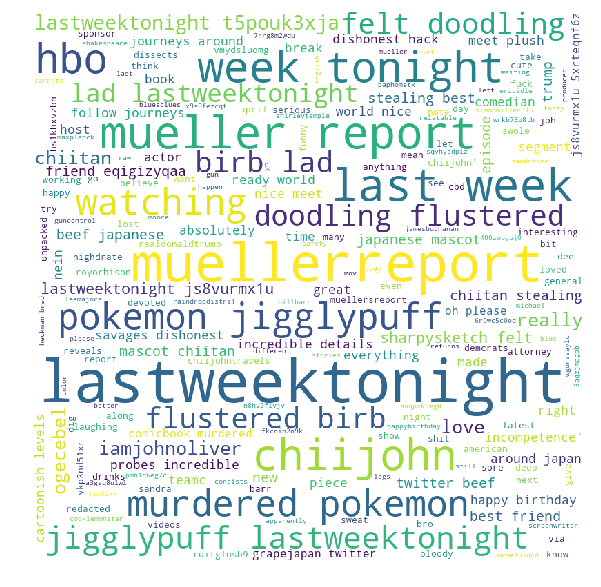

In [30]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = ' '
stopwords = list(STOPWORDS) 
s1=stopwords+["https","co","rt","john","oliver","john oliver","johnoliver"]
for val in Tweet_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = s1, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

pokemon, Jigglypuff, mueller report are the most popular words used in tweets